https://etsin.fairdata.fi/dataset/9d13ef28-2ca7-44b0-9950-225359afac65

https://ieee-dataport.org/documents/5g-nidd-comprehensive-network-intrusion-detection-dataset-generated-over-5g-wireless

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
import pandas as pd

data=pd.read_csv(r"C:\Users\ulami\Desktop\datasety\5G-NIDD\Combined.csv")

C:\Users\ulami\AppData\Local\Temp\ipykernel_7092\2332987556.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"C:\Users\ulami\Desktop\datasety\5G-NIDD\Combined.csv")


In [3]:
data.shape

(1215890, 52)

In [11]:
data.head()

,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,sDSb,sTtl,...,DstLoss,pLoss,Rate,SrcRate,DstRate,State,TcpRtt,SynAck,AckDat,Label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,cs0,58.0,...,0,0.0,0.000000,0.000000,0.000000,ECO,0.0,0.0,0.0,Benign
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,cs0,58.0,...,0,0.0,0.000000,0.000000,0.000000,ECO,0.0,0.0,0.0,Benign
2,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,cs0,117.0,...,0,0.0,42.616875,39.015450,3.401347,CON,0.0,0.0,0.0,Benign
3,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,cs0,117.0,...,0,0.0,36.614376,32.412727,4.001571,CON,0.0,0.0,0.0,Benign
4,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,cs0,117.0,...,0,0.0,44.404858,40.604443,3.600394,CON,0.0,0.0,0.0,Benign


In [5]:
n = 1
data.drop(data.columns[:n], axis=1, inplace=True)

In [6]:
data = data.drop(columns=['Attack Type', 'Attack Tool', 'Seq'])

In [12]:
data.isnull().sum()

Dur           0
RunTime       0
Mean          0
Sum           0
Min           0
Max           0
Proto         0
sTos          0
sDSb          0
sTtl          0
sHops         0
Cause         0
TotPkts       0
SrcPkts       0
DstPkts       0
TotBytes      0
SrcBytes      0
DstBytes      0
Offset        0
sMeanPktSz    0
dMeanPktSz    0
Load          0
SrcLoad       0
DstLoad       0
Loss          0
SrcLoss       0
DstLoss       0
pLoss         0
Rate          0
SrcRate       0
DstRate       0
State         0
TcpRtt        0
SynAck        0
AckDat        0
Label         0
dtype: int64

In [8]:
prev_num_cols = len(data.columns)
data.dropna(axis='columns', thresh=len(data.index) * 0.40, inplace=True)
print("Removed " + str(prev_num_cols - len(data.columns)) +
      " columns with over 60% NaN values.")

Removed 12 columns with over 60% NaN values.


In [9]:
old_num_rows = data.shape[0]
data.dropna(inplace=True)
print("Removed " + str(old_num_rows -
                       data.shape[0]) + " rows with at least one NaN value in it.")

Removed 214 rows with at least one NaN value in it.


In [10]:
data.shape

(1215676, 36)

In [13]:
data.describe(include='object')

,Proto,sDSb,Cause,State,Label
count,1215676,1215676,1215676,1215676,1215676
unique,5,12,3,11,2
top,udp,cs0,Status,REQ,Malicious
freq,903040,1209216,728483,589128,738153


In [14]:
print(data['Label'].value_counts())

Label
Malicious    738153
Benign       477523
Name: count, dtype: int64


In [15]:
print(data['State'].value_counts())

State
REQ    589128
INT    328732
CON    132145
RST     75670
FIN     59181
ECO     28822
ACC      1109
URP       786
RSP        73
TST        28
NRS         2
Name: count, dtype: int64


In [48]:
print(data['Offset'].value_counts())

Offset
128       20
232       11
567948     7
522996     6
585516     6
          ..
184856     1
185060     1
185372     1
185472     1
185772     1
Name: count, Length: 1118819, dtype: int64


# MODEL

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(data)

In [16]:
print(data['Label'].value_counts())

Label
1    738153
0    477523
Name: count, dtype: int64


In [17]:
data.head()

,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,sDSb,sTtl,...,DstLoss,pLoss,Rate,SrcRate,DstRate,State,TcpRtt,SynAck,AckDat,Label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0,7,58.0,...,0,0.0,0.000000,0.000000,0.000000,2,0.0,0.0,0.0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0,7,58.0,...,0,0.0,0.000000,0.000000,0.000000,2,0.0,0.0,0.0,0
2,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,4,0.0,7,117.0,...,0,0.0,42.616875,39.015450,3.401347,1,0.0,0.0,0.0,0
3,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4,0.0,7,117.0,...,0,0.0,36.614376,32.412727,4.001571,1,0.0,0.0,0.0,0
4,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,4,0.0,7,117.0,...,0,0.0,44.404858,40.604443,3.600394,1,0.0,0.0,0.0,0


# OPTUNA

In [17]:
import optuna
from optuna.integration import TFKerasPruningCallback
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


X = data.drop(columns=['Label']).values
y = data['Label'].values

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)

# ---------------------------
# Model factory
# ---------------------------
def create_model(trial, input_dim):
    model = Sequential()
    n_layers = trial.suggest_int("n_layers", 2, 6)
    for i in range(n_layers):
        units = trial.suggest_categorical(f"n_units_l{i}", [8, 16, 32, 64])
        dropout_rate = trial.suggest_categorical(f"dropout_l{i}", [0.0, 0.1, 0.2])

        if i == 0:
            model.add(Dense(units, activation='relu', input_shape=(input_dim,)))
        else:
            model.add(Dense(units, activation='relu'))

        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ---------------------------
# 2) Optuna objective with Stratified K-Fold on trainval
#    + collect out-of-fold predictions to build one CV report per trial
# ---------------------------
trial_reports = []

def objective(trial):
    n_epochs   = trial.suggest_int("epochs", 5, 10)

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

    # Out-of-fold (OOF) predictions aligned to y_trainval
    oof_pred = np.full(shape=y_trainval.shape[0], fill_value=np.nan, dtype=float)

    fold_f1s = []
    folds_meta = []
    for fold_idx, (tr_idx, va_idx) in enumerate(skf.split(X_trainval, y_trainval), start=1):
        X_tr, X_va = X_trainval[tr_idx], X_trainval[va_idx]
        y_tr, y_va = y_trainval[tr_idx], y_trainval[va_idx]

        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_va = scaler.transform(X_va)

        model = create_model(trial, input_dim=X_tr.shape[1])

        early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=0)
        pruning_cb = TFKerasPruningCallback(trial, "val_accuracy")

        model.fit(
            X_tr, y_tr,
            validation_data=(X_va, y_va),
            epochs=n_epochs,
            batch_size=32,
            verbose=0,
            callbacks=[early_stop, pruning_cb]
        )

        va_prob = model.predict(X_va, verbose=0).ravel()
        oof_pred[va_idx] = va_prob
        va_pred = (va_prob > 0.5).astype(int)

        rep = classification_report(y_va, va_pred, output_dict=True, zero_division=0)
        f1_macro = rep['macro avg']['f1-score']
        fold_f1s.append(f1_macro)
        folds_meta.append({'fold': fold_idx, 'f1_macro': float(f1_macro)})

        trial.report(np.mean(fold_f1s), step=fold_idx)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    # Build ONE report per trial from OOF predictions (same structure you used before)
    assert not np.isnan(oof_pred).any(), "OOF predictions not fully filled"
    oof_label = (oof_pred > 0.5).astype(int)
    cv_report = classification_report(y_trainval, oof_label, output_dict=True, zero_division=0)

    # Save exactly the fields your flattening code expects
    trial_reports.append({
        'trial_number': trial.number,
        'params': trial.params,
        'report': cv_report,   # has keys: 'accuracy', 'macro avg', '0', '1', ...
        'folds': folds_meta,
        'mean_f1_macro': float(np.mean(fold_f1s))
    })

    return float(np.mean(fold_f1s))

# ---------------------------
# 3) Run optimization
# ---------------------------
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best params:", study.best_trial.params)
print(f"Best CV macro F1: {study.best_value:.4f}")


C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-08-12 10:45:08,388] A new study created in memory with name: no-name-9b3eb32a-d764-42e4-a3f3-a80dbaf87611
C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\optuna\trial\_trial.py:497: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: User

Best params: {'epochs': 8, 'n_layers': 4, 'n_units_l0': 32, 'dropout_l0': 0.1, 'n_units_l1': 64, 'dropout_l1': 0.1, 'n_units_l2': 8, 'dropout_l2': 0.0, 'n_units_l3': 64, 'dropout_l3': 0.1}
Best CV macro F1: 0.9746


In [23]:
scaler_full = StandardScaler().fit(X_trainval)
X_trainval_scaled = scaler_full.transform(X_trainval)
X_test_scaled = scaler_full.transform(X_test)

best_model = create_model(study.best_trial, input_dim=X_trainval_scaled.shape[1])
best_model.fit(
    X_trainval_scaled, y_trainval,
    epochs=study.best_trial.params['epochs'],
    batch_size=32,
    verbose=0
)

y_test_pred = (best_model.predict(X_test_scaled, verbose=0).ravel() > 0.5).astype(int)
final_report = classification_report(y_test, y_test_pred, zero_division=0)
print("Final Test Set Report:")
print(final_report)

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Final Test Set Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     95505
           1       0.96      1.00      0.98    147631

    accuracy                           0.98    243136
   macro avg       0.98      0.97      0.97    243136
weighted avg       0.98      0.98      0.98    243136



In [30]:
best_model.summary()

Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_306 (Dense)               │ (None, 32)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_189 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_307 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_190 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_308 (Dense)               │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_309 (Dense)               │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_191 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_310 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,277 (51.87 KB)

 Trainable params: 4,425 (17.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,852 (34.58 KB)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')

# Print results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall: {recall * 100:.2f}%")


Test Accuracy: 97.57%
Test Precision: 97.65%
Test Recall: 97.57%


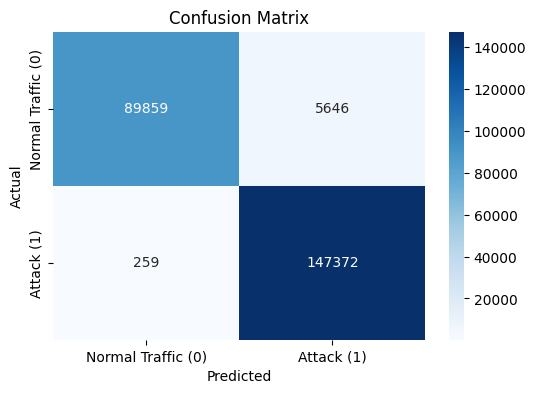

                precision    recall  f1-score   support

Normal Traffic       1.00      0.94      0.97     95505
        Attack       0.96      1.00      0.98    147631

      accuracy                           0.98    243136
     macro avg       0.98      0.97      0.97    243136
  weighted avg       0.98      0.98      0.98    243136



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test, y_test_pred, target_names=['Normal Traffic', 'Attack']))


In [18]:
flattened_reports = []
for entry in trial_reports:
    flat = {
        'trial_number': entry['trial_number'],
        **entry['params'],
        'accuracy': entry['report']['accuracy'],
        'macro_f1': entry['report']['macro avg']['f1-score'],
        'macro_precision': entry['report']['macro avg']['precision'],
        'macro_recall': entry['report']['macro avg']['recall'],
        'class_0_f1': entry['report']['0']['f1-score'],
        'class_1_f1': entry['report']['1']['f1-score']
    }
    flattened_reports.append(flat)

df_reports = pd.DataFrame(flattened_reports)
df_reports.to_csv('optuna_5G_NIDD_new_classification_reports.csv', index=False)

print("Zapisano raporty do: optuna_5G_NIDD_classification_reports.csv")


Zapisano raporty do: optuna_5G_NIDD_classification_reports.csv


In [19]:
import optuna.visualization as vis

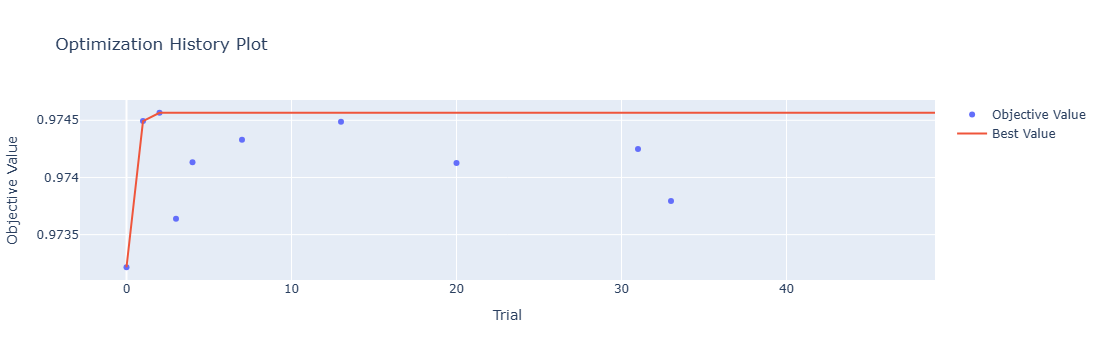

In [20]:
fig1 = optuna.visualization.plot_optimization_history(study)
fig1.show()

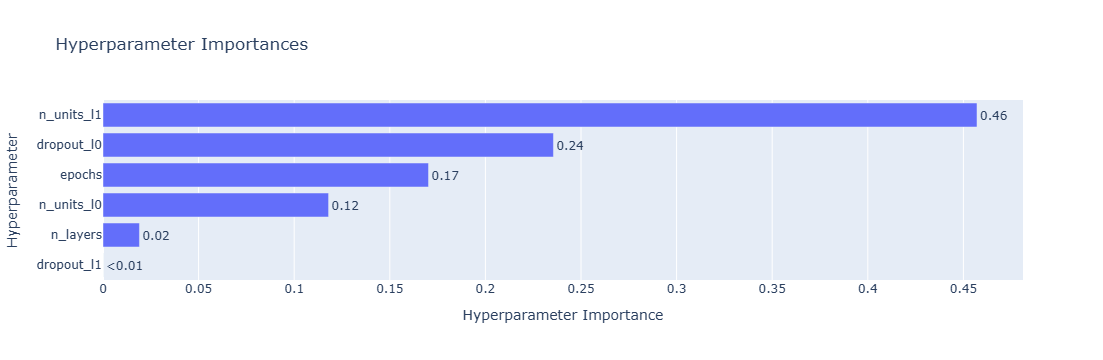

In [21]:
optuna.visualization.plot_param_importances(study).show()


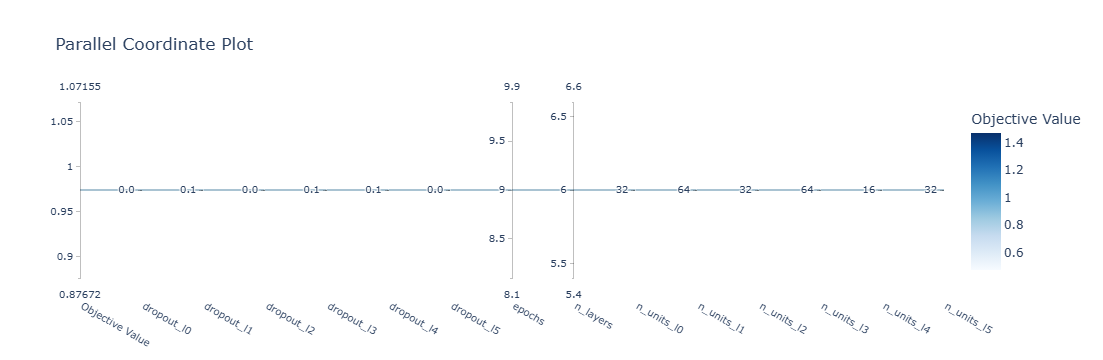

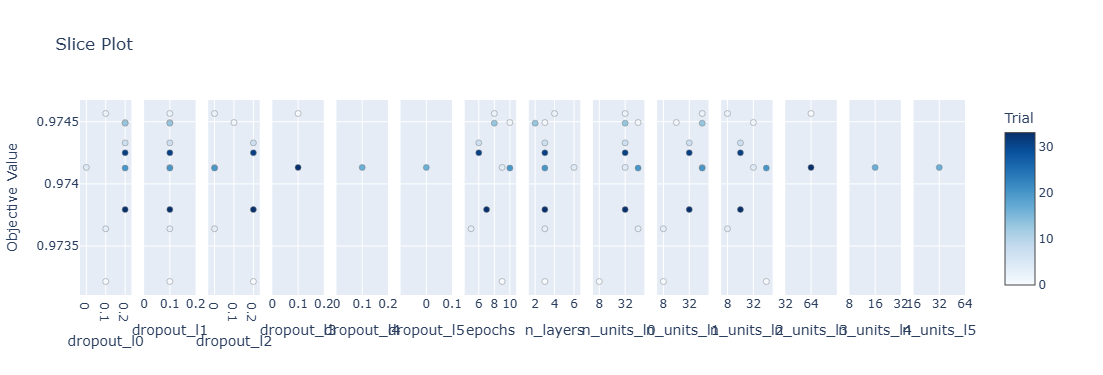

In [22]:
fig3 = optuna.visualization.plot_parallel_coordinate(study)
fig3.show()

fig4 = optuna.visualization.plot_slice(study)
fig4.show()

# Feature Selection with Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

X_df = data.drop(columns=['Label'])  # Keep as DataFrame
y = data['Label']

# Train a Random Forest model for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_df, y)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_df.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
18,Offset,0.509351
9,sTtl,0.091652
19,sMeanPktSz,0.065276
10,sHops,0.054485
31,State,0.033252
34,AckDat,0.024202
16,SrcBytes,0.023454
32,TcpRtt,0.021225
6,Proto,0.020510
33,SynAck,0.018494


In [17]:
print(len(feature_importance_df))
print(len(X_df.columns))

35
35


In [22]:
# ----- Your fixed best hyperparameters -----
best_params = {
    'epochs': 8,
    'n_layers': 4,
    'n_units_l0': 32, 'dropout_l0': 0.1,
    'n_units_l1': 64, 'dropout_l1': 0.1,
    'n_units_l2': 8,  'dropout_l2': 0.0,
    'n_units_l3': 64, 'dropout_l3': 0.1,
    'learning_rate': 1e-3,
    'batch_size': 32
}

Best k = 17 with mean CV macro F1 = 0.9747


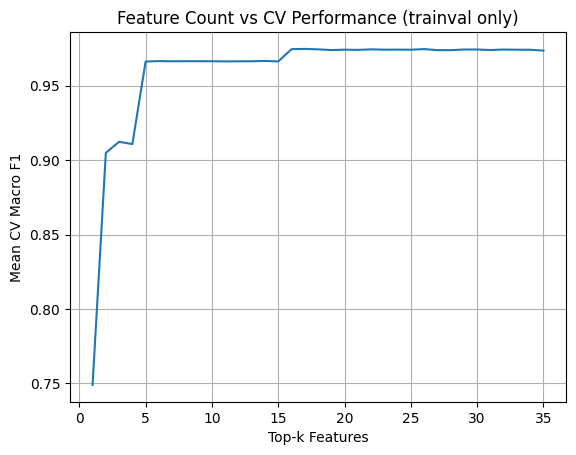

Selected features: ['Offset', 'sTtl', 'sMeanPktSz', 'sHops', 'State', 'AckDat', 'SrcBytes', 'TcpRtt', 'Proto', 'SynAck', 'TotBytes', 'Cause', 'Load', 'Rate', 'SrcLoad', 'Max', 'Dur']
Final Test Set Report (using best_k features):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     95505
           1       0.96      1.00      0.98    147631

    accuracy                           0.98    243136
   macro avg       0.98      0.97      0.97    243136
weighted avg       0.98      0.98      0.98    243136



In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ----- Your fixed best hyperparameters -----
best_params = {
    'epochs': 8,
    'n_layers': 4,
    'n_units_l0': 32, 'dropout_l0': 0.1,
    'n_units_l1': 64, 'dropout_l1': 0.1,
    'n_units_l2': 8,  'dropout_l2': 0.0,
    'n_units_l3': 64, 'dropout_l3': 0.1,
    'learning_rate': 1e-3,
    'batch_size': 32
}

# ----- Split once: trainval / test -----
X_df = data.drop(columns=['Label'])
y = data['Label'].values

X_trainval_df, X_test_df, y_trainval, y_test = train_test_split(
    X_df, y, test_size=0.2, stratify=y, random_state=1
)

# ----- Model builder using your fixed params -----
def build_model(input_dim: int):
    m = Sequential()
    m.add(Input(shape=(input_dim,)))
    for i in range(best_params['n_layers']):
        units = best_params.get(f"n_units_l{i}")
        dr = best_params.get(f"dropout_l{i}", 0.0)
        m.add(Dense(units, activation='relu'))
        if dr and dr > 0:
            m.add(Dropout(dr))
    m.add(Dense(1, activation='sigmoid'))
    m.compile(optimizer=Adam(learning_rate=best_params['learning_rate']),
              loss='binary_crossentropy', metrics=['accuracy'])
    return m

# ----- Prepare top-k feature order (from your RandomForest importances) -----
top_features = (
    feature_importance_df.sort_values('Importance', ascending=False)['Feature']
    .tolist()
)
top_features = [f for f in top_features if f in X_trainval_df.columns]
max_k = len(top_features)

# ----- CV eval for a given k (on trainval only; scaling inside each fold) -----
def cv_macro_f1_for_k(k: int, n_splits: int = 5, seed: int = 1):
    feats = top_features[:k]
    Xk = X_trainval_df[feats].values
    yk = y_trainval

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    fold_scores = []

    for tr_idx, va_idx in skf.split(Xk, yk):
        X_tr, X_va = Xk[tr_idx], Xk[va_idx]
        y_tr, y_va = yk[tr_idx], yk[va_idx]

        scaler = StandardScaler().fit(X_tr)
        X_tr = scaler.transform(X_tr)
        X_va = scaler.transform(X_va)

        model = build_model(input_dim=X_tr.shape[1])
        early = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=0)

        model.fit(X_tr, y_tr,
                  validation_data=(X_va, y_va),
                  epochs=best_params['epochs'],
                  batch_size=best_params['batch_size'],
                  verbose=0,
                  callbacks=[early])

        preds = (model.predict(X_va, verbose=0).ravel() > 0.5).astype(int)
        rep = classification_report(y_va, preds, output_dict=True, zero_division=0)
        fold_scores.append(rep['macro avg']['f1-score'])

    return float(np.mean(fold_scores)), float(np.std(fold_scores))

# ----- Search k = 1..max_k -----
results = []
for k in range(1, max_k + 1):
    mean_f1, std_f1 = cv_macro_f1_for_k(k)
    results.append({'k': k, 'mean_macro_f1': mean_f1, 'std_macro_f1': std_f1})

df_k = pd.DataFrame(results)
best_row = df_k.iloc[df_k['mean_macro_f1'].idxmax()]
best_k = int(best_row['k'])
print(f"Best k = {best_k} with mean CV macro F1 = {best_row['mean_macro_f1']:.4f}")

# ----- Plot performance vs k -----
plt.figure()
plt.plot(df_k['k'], df_k['mean_macro_f1'])
plt.xlabel('Top-k Features')
plt.ylabel('Macro F1')
plt.title('Feature Count vs Performance')
plt.grid(True)
plt.show()

# ----- Final train on all trainval with best_k features; evaluate once on test -----
selected_features = top_features[:best_k]
print("Selected features:", selected_features)

Xtr_sel = X_trainval_df[selected_features].values
Xte_sel = X_test_df[selected_features].values

scaler_full = StandardScaler().fit(Xtr_sel)
Xtr_sel = scaler_full.transform(Xtr_sel)
Xte_sel = scaler_full.transform(Xte_sel)

final_model = build_model(input_dim=Xtr_sel.shape[1])
final_model.fit(
    Xtr_sel, y_trainval,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=0
)

test_preds = (final_model.predict(Xte_sel, verbose=0).ravel() > 0.5).astype(int)
final_report = classification_report(y_test, test_preds, zero_division=0)
print("Final Test Set Report (using best_k features):")
print(final_report)


In [21]:
feature_importance_df.head(5)

,Feature,Importance
18,Offset,0.509351
9,sTtl,0.091652
19,sMeanPktSz,0.065276
10,sHops,0.054485
31,State,0.033252


# WYBRANE 5 NAJWAŻNIEJSZYCH CECH

In [19]:
# ----- Split once: trainval / test -----
X_df = data.drop(columns=['Label'])
y = data['Label'].values

X_trainval_df, X_test_df, y_trainval, y_test = train_test_split(
    X_df, y, test_size=0.2, stratify=y, random_state=1
)

# ----- Prepare top-k feature order (from your RandomForest importances) -----
selected_features = ['Offset', 'sTtl', 'sMeanPktSz', 'sHops', 'State']
max_k = len(selected_features)

In [20]:
Xtr_sel = X_trainval_df[selected_features].values
Xte_sel = X_test_df[selected_features].values

scaler_full = StandardScaler().fit(Xtr_sel)
Xtr_sel = scaler_full.transform(Xtr_sel)
Xte_sel = scaler_full.transform(Xte_sel)

In [18]:
# ----- Model builder using your fixed params -----
def build_model(input_dim: int):
    m = Sequential()
    m.add(Input(shape=(input_dim,)))
    for i in range(best_params['n_layers']):
        units = best_params.get(f"n_units_l{i}")
        dr = best_params.get(f"dropout_l{i}", 0.0)
        m.add(Dense(units, activation='relu'))
        if dr and dr > 0:
            m.add(Dropout(dr))
    m.add(Dense(1, activation='sigmoid'))
    m.compile(optimizer=Adam(learning_rate=best_params['learning_rate']),
              loss='binary_crossentropy', metrics=['accuracy'])
    return m

In [29]:
# ----- Final train on all trainval with best_k features; evaluate once on test -----
selected_features = top_features[:5]
print("Selected features:", selected_features)

final_model = build_model(input_dim=Xtr_sel.shape[1])
final_model.fit(
    Xtr_sel, y_trainval,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1
)

test_preds = (final_model.predict(Xte_sel, verbose=1).ravel() > 0.5).astype(int)
final_report = classification_report(y_test, test_preds, zero_division=0)
print("Final Test Set Report (using best_k features):")
print(final_report)

Selected features: ['Offset', 'sTtl', 'sMeanPktSz', 'sHops', 'State']
Epoch 1/8
30392/30392 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 0.9568 - loss: 0.0941
Epoch 2/8
30392/30392 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9668 - loss: 0.0592
Epoch 3/8
30392/30392 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9673 - loss: 0.0579
Epoch 4/8
30392/30392 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9673 - loss: 0.0574
Epoch 5/8
30392/30392 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9675 - loss: 0.0564
Epoch 6/8
30392/30392 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9677 - loss: 0.0563
Epoch 7/8
30392/30392 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9676 - loss: 0.0562
Epoch 8/8
30392/30392 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.9675 - loss: 0.0559
7598/7598 ━━━━━━━━━━━━━━━━━━━━ 4s 551us/step
Final Test Set Report (using best_k features):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     95505
         

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Calculate metrics
accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds, average='weighted')  # Use 'macro' or 'micro' for different averaging
recall = recall_score(y_test, test_preds, average='weighted')

# Print results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall: {recall * 100:.2f}%")


Test Accuracy: 96.78%
Test Precision: 96.93%
Test Recall: 96.78%


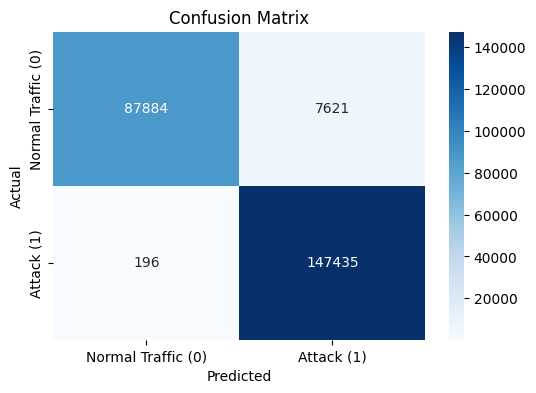

                precision    recall  f1-score   support

Normal Traffic       1.00      0.92      0.96     95505
        Attack       0.95      1.00      0.97    147631

      accuracy                           0.97    243136
     macro avg       0.97      0.96      0.97    243136
  weighted avg       0.97      0.97      0.97    243136



In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, test_preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test, test_preds, target_names=['Normal Traffic', 'Attack']))


In [32]:
# Save the trained model
final_model.save("5G_NIDD_final.keras")

# FGSM

In [22]:
Xte_sel.shape

(243136, 5)

In [21]:
# Separate attack and normal samples
X_test_attack = Xte_sel[y_test == 1]
y_test_attack = y_test[y_test == 1]

X_test_normal = Xte_sel[y_test == 0]
y_test_normal = y_test[y_test == 0]

In [35]:
import tensorflow as tf
import numpy as np

# Separate attack and normal samples
X_test_attack = Xte_sel[y_test == 1]
y_test_attack = y_test[y_test == 1]

X_test_normal = Xte_sel[y_test == 0]
y_test_normal = y_test[y_test == 0]

# Convert to tensors
X_attack_tensor = tf.convert_to_tensor(X_test_attack, dtype=tf.float32)
y_attack_tensor = tf.convert_to_tensor(y_test_attack.astype(np.float32))  # <- remove .values

# FGSM
def fgsm_attack(model, X, y, epsilon):
    with tf.GradientTape() as tape:
        tape.watch(X)
        predictions = model(X)
        loss = tf.keras.losses.binary_crossentropy(tf.reshape(y, (-1, 1)), predictions)
    gradient = tape.gradient(loss, X)
     # Print gradient statistics
    print("Gradient stats:")
    print("  Min:", tf.reduce_min(gradient).numpy())
    print("  Max:", tf.reduce_max(gradient).numpy())
    print("  Mean:", tf.reduce_mean(gradient).numpy()) 
    avg_abs_grad = tf.reduce_mean(tf.abs(gradient), axis=0)
    print("Avg abs gradient per feature:", avg_abs_grad.numpy())
    signed_grad = tf.sign(gradient)
    X_adv = X + epsilon * signed_grad
    return X_adv.numpy()

# Generate adversarial attack examples
epsilon = 0.3
X_attack_adv = fgsm_attack(final_model, X_attack_tensor, y_attack_tensor, epsilon=epsilon)

# Combine normal and adversarial attack samples back together
X_test_combined = np.vstack((X_test_normal, X_attack_adv))
y_test_combined = np.hstack((y_test_normal, y_test_attack))

# shuffle the test set
from sklearn.utils import shuffle
X_test_adv_final, y_test_adv_final = shuffle(X_test_combined, y_test_combined, random_state=1)

Gradient stats:
  Min: -70.22476
  Max: 115.901184
  Mean: 0.05312994
Avg abs gradient per feature: [0.12333715 0.05012506 0.11168104 0.04274821 0.03638838]


In [37]:
Xte_sel.shape

(243136, 5)

In [38]:
X_test_adv_final.shape

(243136, 5)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Get predictions
y_pred = final_model.predict(X_test_adv_final)
y_pred = (y_pred > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test_adv_final, y_pred)
precision = precision_score(y_test_adv_final, y_pred, average='weighted')
recall = recall_score(y_test_adv_final, y_pred, average='weighted')

# Print results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall: {recall * 100:.2f}%")


7598/7598 ━━━━━━━━━━━━━━━━━━━━ 4s 565us/step
Test Accuracy: 85.44%
Test Precision: 86.94%
Test Recall: 85.44%


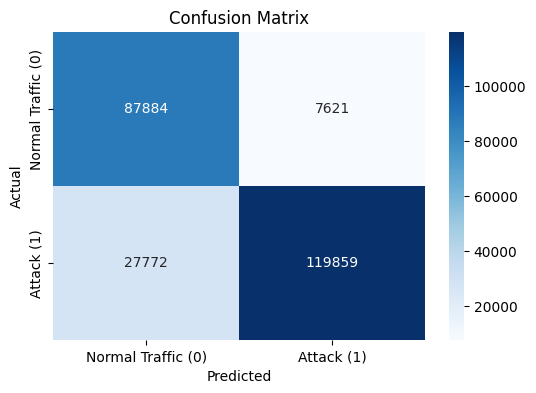

                precision    recall  f1-score   support

Normal Traffic       0.76      0.92      0.83     95505
        Attack       0.94      0.81      0.87    147631

      accuracy                           0.85    243136
     macro avg       0.85      0.87      0.85    243136
  weighted avg       0.87      0.85      0.86    243136



In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test_adv_final, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test_adv_final, y_pred, target_names=['Normal Traffic', 'Attack']))


In [44]:
import numpy as np
import pandas as pd

# Predictions on the (scaled) originals and adversarials
p_orig_attack = final_model.predict(X_test_attack, verbose=0).ravel()
p_adv_attack  = final_model.predict(X_attack_adv,  verbose=0).ravel()

orig_pred = (p_orig_attack > 0.5).astype(int)
adv_pred  = (p_adv_attack  > 0.5).astype(int)

# Masks for transitions
mask_1_to_0 = (orig_pred == 1) & (adv_pred == 0)  # attack → normal
mask_0_to_1 = (orig_pred == 0) & (adv_pred == 1)  # normal → attack (on the same attack samples)

n_1_to_0 = int(mask_1_to_0.sum())
n_0_to_1 = int(mask_0_to_1.sum())

# Optional: unchanged counts
n_1_to_1 = int(((orig_pred == 1) & (adv_pred == 1)).sum())
n_0_to_0 = int(((orig_pred == 0) & (adv_pred == 0)).sum())

total = len(orig_pred)

print(f"Total attack samples: {total}")
print(f"Flipped 1→0 (attack→normal): {n_1_to_0} ({n_1_to_0/total:.2%})")
print(f"Flipped 0→1 (normal→attack): {n_0_to_1} ({n_0_to_1/total:.2%})")
print(f"Stayed 1→1: {n_1_to_1} ({n_1_to_1/total:.2%})")
print(f"Stayed 0→0: {n_0_to_0} ({n_0_to_0/total:.2%})")

# Optional: a tidy 2×2 table of transitions
transition = pd.crosstab(pd.Series(orig_pred, name="orig"),
                         pd.Series(adv_pred,  name="adv"))
print("\nTransition table (orig → adv):\n", transition)


Total attack samples: 147631
Flipped 1→0 (attack→normal): 27591 (18.69%)
Flipped 0→1 (normal→attack): 15 (0.01%)
Stayed 1→1: 119844 (81.18%)
Stayed 0→0: 181 (0.12%)

Transition table (orig → adv):
 adv       0       1
orig               
0       181      15
1     27591  119844


In [46]:
import numpy as np
import pandas as pd

# --- Predict on scaled inputs (no inverse-transform for prediction) ---
p_orig_attack = final_model.predict(X_test_attack, verbose=0).ravel()
p_adv_attack  = final_model.predict(X_attack_adv,  verbose=0).ravel()

orig_pred = (p_orig_attack > 0.5).astype(int)
adv_pred  = (p_adv_attack  > 0.5).astype(int)

# --- Find flips: 1 -> 0 ---
idx_flip = np.where((orig_pred == 1) & (adv_pred == 0))[0]
print(f"Total attack samples: {len(X_test_attack)}")
print(f"Flipped (1→0): {len(idx_flip)}")

if idx_flip.size == 0:
    print("No examples flipped from attack (1) to normal (0).")
else:
    # show up to N examples
    N = 10
    idx_show = idx_flip[:N]

    # inverse-transform ONLY FOR DISPLAY
    scaler_display = scaler if 'scaler' in locals() else scaler_full
    X_orig_disp = scaler_display.inverse_transform(X_test_attack[idx_show])
    X_adv_disp  = scaler_display.inverse_transform(X_attack_adv[idx_show])

    # predictions (from the already-computed probs)
    y_pred_orig = orig_pred[idx_show]
    y_pred_adv  = adv_pred[idx_show]

    # build tables like before
    df_original = pd.DataFrame(X_orig_disp, columns=column_names)
    df_original["Prediction"] = y_pred_orig

    df_adversarial = pd.DataFrame(X_adv_disp, columns=column_names)
    df_adversarial["Prediction"] = y_pred_adv

    # display settings (same style as earlier)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.precision', 6)
    pd.set_option('display.width', 200)

    print("\n🟦 Original Attack Samples (that later flipped 1→0):\n")
    print(df_original)

    print("\n🟥 Corresponding Adversarial Samples:\n")
    print(df_adversarial)

# 🟩 Normal samples for comparison (first up to 10)
n_norm = min(10, len(X_test_normal))
X_norm_scaled = X_test_normal[:n_norm]  # already scaled
scaler_display = scaler if 'scaler' in locals() else scaler_full

# Inverse-transform for display only
X_norm_disp = scaler_display.inverse_transform(X_norm_scaled)

# Predictions on scaled inputs
y_pred_norm = (final_model.predict(X_norm_scaled, verbose=0).ravel() > 0.5).astype(int)

# Build table
df_normal = pd.DataFrame(X_norm_disp, columns=column_names)
df_normal["Prediction"] = y_pred_norm

print("\n🟩 Normal Samples (benign) for comparison:\n")
print(df_normal)


Total attack samples: 147631
Flipped (1→0): 27591

🟦 Original Attack Samples (that later flipped 1→0):

       Offset  sTtl  sMeanPktSz  sHops  State  Prediction
0  20454732.0  63.0        42.0    1.0    6.0           1
1  18607380.0  63.0        42.0    1.0    6.0           1
2  21827204.0  63.0        42.0    1.0    6.0           1
3  16935744.0  63.0        42.0    1.0    6.0           1
4    579756.0  54.0        58.0   10.0    6.0           1
5   7292880.0  63.0       119.0    1.0    1.0           1
6  19172012.0  63.0        42.0    1.0    6.0           1
7   5559636.0  63.0        69.5    1.0    3.0           1
8    441280.0  63.0        42.0    1.0    2.0           1
9   4128084.0  63.0        67.0    1.0    1.0           1

🟥 Corresponding Adversarial Samples:

        Offset       sTtl  sMeanPktSz     sHops     State  Prediction
0  23665006.00  79.774796   85.542694  2.069372  5.442003           0
1  21817654.00  46.225208   85.542694  2.069372  5.442003           0
2  186169

# FGSM with real-life values

In [21]:
from tensorflow.keras.models import load_model
final_model = load_model(r"C:\Users\ulami\Desktop\magisterka\models_final\5G_NIDD_csv_final.keras")   

In [20]:
import numpy as np

def enforce_realistic_values_and_rescale(X_scaled, X_orig_scaled, scaler, feature_order):
    """
    Enforce constraints in original units, then rescale.
    Ensures integer features remain exactly integer even after rescaling.
    """
    # Work in float64 to minimize roundoff
    X = scaler.inverse_transform(np.asarray(X_scaled, dtype=np.float64))
    X_orig = scaler.inverse_transform(np.asarray(X_orig_scaled, dtype=np.float64))
    idx = {c: i for i, c in enumerate(feature_order)}

    # --- helpers ---
    def snap_int(arr, low=None, high=None):
        out = np.rint(arr)
        if low is not None or high is not None:
            out = np.clip(out, low if low is not None else out.min(),
                               high if high is not None else out.max())
        # Snap tiny residuals exactly to integers (safety)
        eps = 1e-12
        out = np.where(np.abs(out - np.rint(out)) < eps, np.rint(out), out)
        return out

    # Keep State exactly as original
    if 'State' in idx:
        i = idx['State']
        X[:, i] = X_orig[:, i]

    # Offset: integer >= 0
    if 'Offset' in idx:
        i = idx['Offset']
        X[:, i] = snap_int(X[:, i], low=0)

    # sTtl: integer in [1, 255]
    if 'sTtl' in idx:
        i = idx['sTtl']
        X[:, i] = snap_int(X[:, i], low=1, high=255)

    # sHops: integer >= 1 (strictly positive)
    if 'sHops' in idx:
        i = idx['sHops']
        X[:, i] = snap_int(X[:, i], low=1)

    # sMeanPktSz: strictly positive (float)
    if 'sMeanPktSz' in idx:
        i = idx['sMeanPktSz']
        X[:, i] = np.maximum(X[:, i], 1e-6)

    # First scale (float64 to preserve precision)
    X_scaled_out = scaler.transform(X.astype(np.float64))

    # --- anti-drift pass ---
    X_roundtrip = scaler.inverse_transform(X_scaled_out)

    if 'Offset' in idx:
        i = idx['Offset']
        X_roundtrip[:, i] = snap_int(X_roundtrip[:, i], low=0)
    if 'sTtl' in idx:
        i = idx['sTtl']
        X_roundtrip[:, i] = snap_int(X_roundtrip[:, i], low=1, high=255)
    if 'sHops' in idx:
        i = idx['sHops']
        X_roundtrip[:, i] = snap_int(X_roundtrip[:, i], low=1)

    if 'sMeanPktSz' in idx:
        i = idx['sMeanPktSz']
        X_roundtrip[:, i] = np.maximum(X_roundtrip[:, i], 1e-6)

    # Final scale; cast to float32 if needed
    return scaler.transform(X_roundtrip).astype(np.float32)


In [25]:
import tensorflow as tf
import numpy as np

# ---- Split attack/normal on the (scaled) test set ----
X_test_attack = Xte_sel[y_test == 1]
y_test_attack = y_test[y_test == 1]

X_test_normal = Xte_sel[y_test == 0]
y_test_normal = y_test[y_test == 0]

# Convert to tensors
X_attack_tensor = tf.convert_to_tensor(X_test_attack, dtype=tf.float32)
y_attack_tensor = tf.convert_to_tensor(y_test_attack.astype(np.float32))

# Feature order & scaler used in training
feature_order = selected_features  # e.g. ['Offset','sTtl','sMeanPktSz','sHops','State']
scaler_project = scaler if 'scaler' in locals() else scaler_full
feat_idx = {c: i for i, c in enumerate(feature_order)}

# ---- FGSM with feature mask (exclude 'State') ----
def fgsm_attack(model, X, y, epsilon, feature_mask=None):
    with tf.GradientTape() as tape:
        tape.watch(X)
        predictions = model(X)
        loss = tf.keras.losses.binary_crossentropy(tf.reshape(y, (-1, 1)), predictions)
    gradient = tape.gradient(loss, X)

    # Optional debug
    print("Gradient stats:")
    print("  Min:", tf.reduce_min(gradient).numpy())
    print("  Max:", tf.reduce_max(gradient).numpy())
    print("  Mean:", tf.reduce_mean(gradient).numpy())
    print("Avg abs gradient per feature:", tf.reduce_mean(tf.abs(gradient), axis=0).numpy())

    signed_grad = tf.sign(gradient)
    if feature_mask is not None:
        mask = tf.reshape(tf.convert_to_tensor(feature_mask, dtype=X.dtype), (1, -1))
        signed_grad = signed_grad * mask  # broadcast across batch

    X_adv = X + epsilon * signed_grad
    return X_adv.numpy()

# Build a mask: 1 = allowed to change, 0 = frozen
mask_vec = np.ones(X_test_attack.shape[1], dtype=np.float32)
if 'State' in feat_idx:
    mask_vec[feat_idx['State']] = 0.0  # do NOT perturb State

epsilon = 0.3
X_attack_adv = fgsm_attack(final_model, X_attack_tensor, y_attack_tensor,
                           epsilon=epsilon, feature_mask=mask_vec)

X_attack_adv = enforce_realistic_values_and_rescale(
    X_attack_adv, X_test_attack, scaler_project, feature_order
)

# ---- Rebuild the (scaled) test set and labels ----
X_test_combined = np.vstack((X_test_normal, X_attack_adv))
y_test_combined = np.hstack((y_test_normal, y_test_attack))

from sklearn.utils import shuffle
X_test_adv_final, y_test_adv_final = shuffle(
    X_test_combined, y_test_combined, random_state=1
)


Gradient stats:
  Min: -70.22476
  Max: 115.901184
  Mean: 0.05312994
Avg abs gradient per feature: [0.12333715 0.05012506 0.11168104 0.04274821 0.03638838]


In [26]:
X_test_adv_final.shape

(243136, 5)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Get predictions
y_pred = final_model.predict(X_test_adv_final)
y_pred = (y_pred > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test_adv_final, y_pred)
precision = precision_score(y_test_adv_final, y_pred, average='weighted')
recall = recall_score(y_test_adv_final, y_pred, average='weighted')

# Print results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall: {recall * 100:.2f}%")


7598/7598 ━━━━━━━━━━━━━━━━━━━━ 7s 858us/step
Test Accuracy: 87.42%
Test Precision: 88.36%
Test Recall: 87.42%


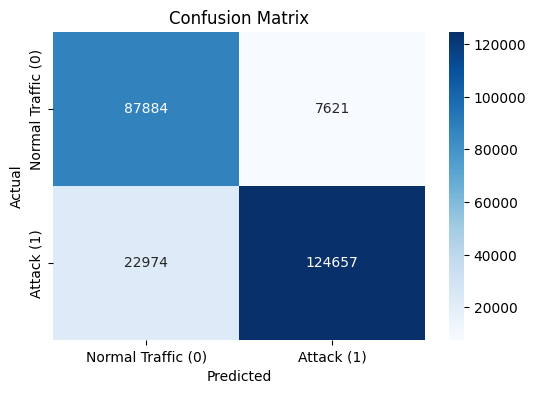

                precision    recall  f1-score   support

Normal Traffic       0.79      0.92      0.85     95505
        Attack       0.94      0.84      0.89    147631

      accuracy                           0.87    243136
     macro avg       0.87      0.88      0.87    243136
  weighted avg       0.88      0.87      0.88    243136



In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test_adv_final, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test_adv_final, y_pred, target_names=['Normal Traffic', 'Attack']))


In [30]:
import numpy as np
import pandas as pd

column_names = selected_features

# --- Predict on scaled inputs (no inverse-transform for prediction) ---
p_orig_attack = final_model.predict(X_test_attack, verbose=0).ravel()
p_adv_attack  = final_model.predict(X_attack_adv,  verbose=0).ravel()

orig_pred = (p_orig_attack > 0.5).astype(int)
adv_pred  = (p_adv_attack  > 0.5).astype(int)

# --- Find flips: 1 -> 0 ---
idx_flip = np.where((orig_pred == 1) & (adv_pred == 0))[0]
print(f"Total attack samples: {len(X_test_attack)}")
print(f"Flipped (1→0): {len(idx_flip)}")

if idx_flip.size == 0:
    print("No examples flipped from attack (1) to normal (0).")
else:
    # show up to N examples
    N = 10
    idx_show = idx_flip[:N]

    # inverse-transform ONLY FOR DISPLAY
    scaler_display = scaler if 'scaler' in locals() else scaler_full
    X_orig_disp = scaler_display.inverse_transform(X_test_attack[idx_show])
    X_adv_disp  = scaler_display.inverse_transform(X_attack_adv[idx_show])

    # predictions (from the already-computed probs)
    y_pred_orig = orig_pred[idx_show]
    y_pred_adv  = adv_pred[idx_show]

    # build tables like before
    df_original = pd.DataFrame(X_orig_disp, columns=column_names)
    df_original["Prediction"] = y_pred_orig

    df_adversarial = pd.DataFrame(X_adv_disp, columns=column_names)
    df_adversarial["Prediction"] = y_pred_adv

    # display settings (same style as earlier)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.precision', 6)
    pd.set_option('display.width', 200)

    print("\n🟦 Original Attack Samples (that later flipped 1→0):\n")
    print(df_original)

    print("\n🟥 Corresponding Adversarial Samples:\n")
    print(df_adversarial)

# 🟩 Normal samples for comparison (first up to 10)
n_norm = min(10, len(X_test_normal))
X_norm_scaled = X_test_normal[:n_norm]  # already scaled
scaler_display = scaler if 'scaler' in locals() else scaler_full

# Inverse-transform for display only
X_norm_disp = scaler_display.inverse_transform(X_norm_scaled)

# Predictions on scaled inputs
y_pred_norm = (final_model.predict(X_norm_scaled, verbose=0).ravel() > 0.5).astype(int)

# Build table
df_normal = pd.DataFrame(X_norm_disp, columns=column_names)
df_normal["Prediction"] = y_pred_norm

print("\n🟩 Normal Samples (benign) for comparison:\n")
print(df_normal)


Total attack samples: 147631
Flipped (1→0): 22802

🟦 Original Attack Samples (that later flipped 1→0):

       Offset  sTtl  sMeanPktSz  sHops  State  Prediction
0  20454732.0  63.0   42.000000    1.0    6.0           1
1  18607380.0  63.0   42.000000    1.0    6.0           1
2   2916940.0  63.0  149.199997    1.0    1.0           1
3   1861824.0  63.0  115.333336    1.0    1.0           1
4   7292880.0  63.0  119.000000    1.0    1.0           1
5   3959864.0  63.0  110.285713    1.0    1.0           1
6  19172012.0  63.0   42.000000    1.0    6.0           1
7   4411352.0  63.0  117.500000    1.0    1.0           1
8   5639872.0  63.0  117.500000    1.0    1.0           1
9   4677092.0  63.0  110.000000    1.0    1.0           1

🟥 Corresponding Adversarial Samples:

         Offset  sTtl  sMeanPktSz  sHops  State  Prediction
0  2.366501e+07  80.0   85.542694    2.0    6.0           0
1  2.181765e+07  46.0   85.542694    2.0    6.0           0
2  7.798096e-01  46.0  192.742691    2.

# ZOO

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score

# ---------- Utilities ----------
def predict_proba(model, X):
    """Return P(y=1) as a flat numpy array."""
    return model.predict(X, verbose=0).ravel()

def bce_loss(p, y):
    """Binary cross-entropy (elementwise) with clipping for numerical stability."""
    eps = 1e-7
    p = np.clip(p, eps, 1 - eps)
    return -(y * np.log(p) + (1 - y) * np.log(1 - p))

def loss_at_x(model, x, y_scalar):
    """Loss at a single point x (1D) for label y in {0,1}."""
    p = predict_proba(model, x[None, :])[0]
    return bce_loss(p, y_scalar)

def finite_diff_grad(model, x, y_scalar, h=1e-3):
    """
    Central-difference gradient of loss wrt x.
    Uses 2*d queries per call (d = number of features).
    """
    d = x.shape[0]
    batch_plus = np.repeat(x[None, :], d, axis=0)
    batch_minus = batch_plus.copy()
    for i in range(d):
        batch_plus[i, i] += h
        batch_minus[i, i] -= h

    p_plus = predict_proba(model, batch_plus)
    p_minus = predict_proba(model, batch_minus)
    L_plus = bce_loss(p_plus, np.full(d, y_scalar))
    L_minus = bce_loss(p_minus, np.full(d, y_scalar))

    # central difference derivative dL/dx_i ≈ (L(x+h e_i) - L(x-h e_i)) / (2h)
    grad = (L_plus - L_minus) / (2.0 * h)
    queries = 2 * d
    return grad, queries

def project_linf(x0, x, eps):
    """Project x to the Linf ball around x0 with radius eps."""
    return np.clip(x, x0 - eps, x0 + eps)

def project_l2(x0, x, eps):
    """Project x to the L2 ball around x0 with radius eps."""
    delta = x - x0
    norm = np.linalg.norm(delta, ord=2)
    if norm > eps:
        delta = delta * (eps / (norm + 1e-12))
    return x0 + delta

# ---------- Core ZOO attacker (single example) ----------
def zoo_attack_single(
    model,
    x0,
    y_true,
    steps=300,
    lr=0.05,
    h=1e-3,
    eps=0.5,
    norm="linf",          # "linf" or "l2"
    targeted=None,        # None for untargeted; otherwise target label in {0,1}
    clip_min=None,
    clip_max=None,
    early_stop=True
):
    """
    Runs ZOO on one sample.
    - Untargeted: ascend BCE loss for the true label until misclassification.
    - Targeted:   descend BCE loss for the chosen target label until classified as target.

    Returns: x_adv, success(bool), queries(int), iters(int)
    """
    x = x0.copy()
    queries = 0
    d = x.size

    # Choose projector
    projector = project_linf if norm == "linf" else project_l2

    # Initial check
    p0 = predict_proba(model, x[None, :])[0]; queries += 1
    y_pred0 = int(p0 > 0.5)
    already_wrong = (y_pred0 != y_true)
    if targeted is None and already_wrong:
        return x, True, queries, 0  # already misclassified

    for t in range(1, steps + 1):
        # For targeted, define loss towards the target; for untargeted, towards the true label
        label_for_loss = targeted if targeted is not None else y_true

        # Zeroth-order gradient estimate of d(loss)/dx
        grad, q = finite_diff_grad(model, x, label_for_loss, h=h)
        queries += q

        # Update rule: untargeted -> ascend; targeted -> descend
        direction = +1.0 if targeted is None else -1.0
        x = x + direction * lr * grad

        # Project to epsilon-ball around original point
        x = projector(x0, x, eps)

        # Optional: keep within observed data range to avoid extreme z-scores
        if (clip_min is not None) and (clip_max is not None):
            x = np.minimum(np.maximum(x, clip_min), clip_max)

        # Check success condition
        p = predict_proba(model, x[None, :])[0]; queries += 1
        y_pred = int(p > 0.5)
        success = (y_pred != y_true) if targeted is None else (y_pred == targeted)

        if early_stop and success:
            return x, True, queries, t

    # End of budget
    p = predict_proba(model, x[None, :])[0]; queries += 1
    y_pred = int(p > 0.5)
    success = (y_pred != y_true) if targeted is None else (y_pred == targeted)
    return x, success, queries, steps

# ---------- Convenience: attack a batch and summarize ----------
def run_zoo_attack(
    model,
    X,
    y,
    X_train_for_bounds=None,     # e.g., Xtr_sel to bound to observed range
    max_samples=100,
    eps=0.5,
    norm="linf",
    steps=300,
    lr=0.05,
    h=1e-3,
    targeted=None,
    only_on_correct=True,
    random_state=0
):
    rng = np.random.default_rng(random_state)

    # Bounds from training data (optional but recommended for tabular)
    if X_train_for_bounds is not None:
        clip_min = X_train_for_bounds.min(axis=0)
        clip_max = X_train_for_bounds.max(axis=0)
    else:
        clip_min = clip_max = None

    # Decide which indices to attack
    y_pred_all = (predict_proba(model, X) > 0.5).astype(int)
    if only_on_correct:
        candidates = np.where(y_pred_all == y)[0]
    else:
        candidates = np.arange(len(y))
    rng.shuffle(candidates)
    idxs = candidates[:max_samples]

    successes = []
    queries_list = []
    iters_list = []
    X_adv = np.copy(X)

    for idx in idxs:
        x0 = X[idx]
        y_true = int(y[idx])
        x_adv, success, q, iters = zoo_attack_single(
            model=model,
            x0=x0,
            y_true=y_true,
            steps=steps,
            lr=lr,
            h=h,
            eps=eps,
            norm=norm,
            targeted=targeted,
            clip_min=clip_min,
            clip_max=clip_max,
            early_stop=True
        )
        X_adv[idx] = x_adv
        successes.append(success)
        queries_list.append(q)
        iters_list.append(iters)

    # Metrics
    success_rate = np.mean(successes) if len(successes) else 0.0
    avg_queries = np.mean(queries_list) if queries_list else 0
    avg_iters = np.mean(iters_list) if iters_list else 0

    # Evaluate accuracy before/after (on attacked subset)
    acc_before = accuracy_score(y[idxs], y_pred_all[idxs])
    acc_after = accuracy_score(y[idxs], (predict_proba(model, X_adv[idxs]) > 0.5).astype(int))

    summary = {
        "num_attacked": len(idxs),
        "only_on_correct": only_on_correct,
        "targeted": targeted,
        "eps": eps,
        "norm": norm,
        "steps": steps,
        "lr": lr,
        "h": h,
        "success_rate": float(success_rate),
        "avg_queries": float(avg_queries),
        "avg_iters": float(avg_iters),
        "acc_before_on_subset": float(acc_before),
        "acc_after_on_subset": float(acc_after),
        "attacked_indices": idxs,
        "successes_bool": np.array(successes, dtype=bool),
        "queries_each": np.array(queries_list, dtype=int),
        "iters_each": np.array(iters_list, dtype=int),
        "X_adv": X_adv,  # full array with adversarial versions at attacked indices
    }
    return summary

In [32]:

# --- 1) Slice out ATTACK samples (y == 1) from your standardized test set ---
attack_mask = (y_test.astype(int) == 1)
X_attack = Xte_sel[attack_mask]
y_attack = y_test[attack_mask].astype(int)

print(f"Attack samples in test set: {len(y_attack)}")

# Baseline detection on those attack samples
pred_attack_before = (final_model.predict(X_attack, verbose=0).ravel() > 0.5).astype(int)
tpr_before = (pred_attack_before == 1).mean()  # detection rate among attack samples
print(f"Baseline detection rate on attack samples (TPR): {tpr_before:.3f}")

# --- 2) Run TARGETED ZOO to force label 0 (normal) on attack samples only ---
zoo_attack_on_attacks = run_zoo_attack(
    model=final_model,
    X=X_attack[:200],
    y=y_attack[:200],
    X_train_for_bounds=None,   # black-box friendly; use Xtr_sel if you're OK with train-derived bounds
    targeted=0,                # <- IMPORTANT: push to normal class
    only_on_correct=True,      # only try to evade ones currently detected as attack
    max_samples=min(200, len(y_attack)),  # cap if large set
    eps=0.3,                   # Linf radius in STANDARDIZED units
    norm="linf",
    steps=150,
    lr=0.1,
    h=1e-3,
    random_state=1
)

print("==== ZOO on attack samples (targeted to NORMAL / 0) ====")
for k, v in zoo_attack_on_attacks.items():
    if k in {"X_adv", "attacked_indices", "successes_bool", "queries_each", "iters_each"}:
        continue
    print(f"{k}: {v}")

# --- 3) Evaluate evasion on attacked subset and overall attack set ---
X_attack_adv = zoo_attack_on_attacks["X_adv"]  # same shape as X_attack; attacked indices modified
attacked_local_idx = zoo_attack_on_attacks["attacked_indices"]
success_flags = zoo_attack_on_attacks["successes_bool"]
queries_each = zoo_attack_on_attacks["queries_each"]

# Predictions AFTER on attack-only array (includes both attacked & untouched elements)
pred_attack_after = (final_model.predict(X_attack_adv, verbose=0).ravel() > 0.5).astype(int)
tpr_after = (pred_attack_after == 1).mean()
evasion_rate_all_attacks = (pred_attack_after == 0).mean()

# Evasion rate restricted to actually ATTACKED samples
evasion_rate_attacked = success_flags.mean() if len(success_flags) else 0.0
avg_queries_attacked = queries_each.mean() if len(queries_each) else 0.0

print(f"\n--- Evasion results ---")
print(f"Detection rate on attack samples BEFORE: {tpr_before:.3f}")
print(f"Detection rate on attack samples AFTER:  {tpr_after:.3f}")
print(f"Evasion rate among ALL attack samples:   {evasion_rate_all_attacks:.3f}")
print(f"Evasion rate among ATTACKED subset:      {evasion_rate_attacked:.3f}")
print(f"Avg queries per attacked sample:         {avg_queries_attacked:.1f}")

# --- 4) (Optional) Put adversarial attacks back into the FULL test matrix ---
# This is handy if you want to re-run a full classification report after evasion.
# Xte_adv_full = Xte_sel.copy()
# global_attack_indices = np.where(attack_mask)[0]
# Xte_adv_full[global_attack_indices] = X_attack_adv

# # Example: full post-attack report
# test_preds_after = (final_model.predict(Xte_adv_full, verbose=0).ravel() > 0.5).astype(int)

# from sklearn.metrics import classification_report
# print("\nFinal Test Set Report AFTER targeted ZOO on attack samples:")
# print(classification_report(y_test, test_preds_after, zero_division=0))


Attack samples in test set: 147631
Baseline detection rate on attack samples (TPR): 0.999
==== ZOO on attack samples (targeted to NORMAL / 0) ====
num_attacked: 200
only_on_correct: True
targeted: 0
eps: 0.3
norm: linf
steps: 150
lr: 0.1
h: 0.001
success_rate: 0.48
avg_queries: 888.78
avg_iters: 80.66
acc_before_on_subset: 1.0
acc_after_on_subset: 0.52

--- Evasion results ---
Detection rate on attack samples BEFORE: 0.999
Detection rate on attack samples AFTER:  0.520
Evasion rate among ALL attack samples:   0.480
Evasion rate among ATTACKED subset:      0.480
Avg queries per attacked sample:         888.8


In [33]:
# ---- Rebuild the (scaled) test set and labels ----
X_test_combined = np.vstack((X_test_normal, X_attack_adv))
y_test_combined = np.hstack((y_test_normal, y_test_attack[:200]))

from sklearn.utils import shuffle
X_test_adv_final, y_test_adv_final = shuffle(
    X_test_combined, y_test_combined, random_state=1
)

2991/2991 ━━━━━━━━━━━━━━━━━━━━ 3s 867us/step


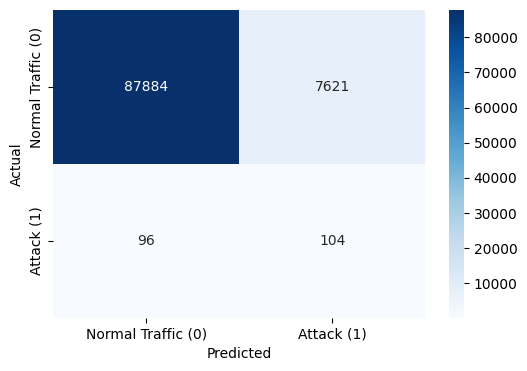

                precision    recall  f1-score   support

Normal Traffic       1.00      0.92      0.96     95505
        Attack       0.01      0.52      0.03       200

      accuracy                           0.92     95705
     macro avg       0.51      0.72      0.49     95705
  weighted avg       1.00      0.92      0.96     95705



In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
y_pred = final_model.predict(X_test_adv_final)
y_pred = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test_adv_final, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test_adv_final, y_pred, target_names=['Normal Traffic', 'Attack']))


In [43]:
import numpy as np
import pandas as pd

# --- 1) Collect only the successfully flipped samples (1 → 0) ---
success_mask = zoo_attack_on_attacks["successes_bool"]
attacked_idx = zoo_attack_on_attacks["attacked_indices"]
successful_local_idx = np.array(attacked_idx)[success_mask]

# Standardized (model-space) originals + adversarials for those successes
X_orig_success_std = X_attack[successful_local_idx]
X_adv_success_std  = zoo_attack_on_attacks["X_adv"][successful_local_idx]

# Sanity: keep only those that truly flipped 1->0 according to the model
pred_orig = (final_model.predict(X_orig_success_std, verbose=0).ravel() > 0.5).astype(int)
pred_adv  = (final_model.predict(X_adv_success_std,  verbose=0).ravel() > 0.5).astype(int)

flip_mask = (pred_orig == 1) & (pred_adv == 0)
X_orig_success_std = X_orig_success_std[flip_mask]
X_adv_success_std  = X_adv_success_std[flip_mask]
pred_orig = pred_orig[flip_mask]
pred_adv  = pred_adv[flip_mask]

# --- 2) Inverse-transform back to original feature units ---
# scaler_full was fit on the selected columns used by the model (Xtr_sel)
X_orig_success = scaler_full.inverse_transform(X_orig_success_std)
X_adv_success  = scaler_full.inverse_transform(X_adv_success_std)

# --- 3) Build DataFrames with your desired columns and formatting ---
cols = ["Offset", "sTtl", "sMeanPktSz", "sHops", "State"]  # order you want to display

def make_df(X, preds):
    df = pd.DataFrame(X, columns=cols)
    # Format dtypes to match your sample output
    # int_like = ["Offset", "sTtl", "sHops", "State"]
    # for c in int_like:
    #     # If values are near integers, round; otherwise leave as-is
    #     df[c] = np.round(df[c]).astype(float)  # keep .0 suffix like in your example
    # # sMeanPktSz can keep float with typical precision
    # df["sMeanPktSz"] = df["sMeanPktSz"].astype(float)
    # df["Prediction"] = preds.astype(int)
    return df

df_orig = make_df(X_orig_success, pred_orig)
df_adv  = make_df(X_adv_success,  pred_adv)

# --- 4) Show up to 10 examples in your exact format ---
n_show = min(10, len(df_orig))

print("Original Attack Samples (that later flipped 1→0):\n")
print(df_orig.head(n_show).to_string(index=True))

print("\nAdversarial Counterparts:\n")
print(df_adv.head(n_show).to_string(index=True))


Original Attack Samples (that later flipped 1→0):

       Offset  sTtl  sMeanPktSz  sHops  State
0  16032740.0  63.0        42.0    1.0    6.0
1  13536276.0  63.0        42.0    1.0    6.0
2   3971164.0  63.0        67.0    1.0    1.0
3  16564444.0  63.0        42.0    1.0    6.0
4  17410420.0  63.0        42.0    1.0    6.0
5   5828228.0  63.0       107.0    1.0    1.0
6   5292812.0  63.0        67.0    1.0    1.0
7  23711652.0  63.0        42.0    1.0    6.0
8    136852.0  58.0        42.0    6.0    4.0
9  14685668.0  63.0         0.0    1.0    8.0

Adversarial Counterparts:

         Offset       sTtl  sMeanPktSz     sHops     State
0  2.040952e+07  63.044827  114.571159  1.262777  5.757626
1  1.888673e+07  72.212918  114.571159  1.860176  5.777233
2  1.511203e+06  63.298623  139.571159  2.581590  1.019911
3  2.022300e+07  60.609679  114.571159  1.203117  5.735035
4  2.109577e+07  60.706998  114.571159  1.175326  5.755966
5  4.369651e+06  56.763568  105.204020  2.192694  1.184345
6 

# ZOO RRALISTIC VALUES

In [35]:
import numpy as np
from sklearn.metrics import accuracy_score

# ---------- Your realism enforcer, extended to also honor a feature mask ----------
def enforce_realistic_values_and_rescale_with_mask(
    X_scaled,
    X_orig_scaled,
    scaler,
    feature_order,
    feature_mask=None,     # 1=changeable, 0=frozen; shape=(d,)
):
    """
    Same as your enforce_realistic_values_and_rescale(), but also freezes any
    feature with mask==0 exactly to its original value (in original units).
    Works on a batch.
    """
    X = scaler.inverse_transform(np.asarray(X_scaled, dtype=np.float64))
    X_orig = scaler.inverse_transform(np.asarray(X_orig_scaled, dtype=np.float64))
    idx = {c: i for i, c in enumerate(feature_order)}

    # Freeze masked-off features exactly to original (in original units)
    if feature_mask is not None:
        frozen_cols = np.where(np.asarray(feature_mask) == 0)[0]
        if frozen_cols.size:
            X[:, frozen_cols] = X_orig[:, frozen_cols]

    def snap_int(arr, low=None, high=None):
        out = np.rint(arr)
        if (low is not None) or (high is not None):
            out = np.clip(out, low if low is not None else out.min(),
                               high if high is not None else out.max())
        eps = 1e-12
        out = np.where(np.abs(out - np.rint(out)) < eps, np.rint(out), out)
        return out

    # Keep State exactly as original
    if 'State' in idx:
        i = idx['State']
        X[:, i] = X_orig[:, i]

    # Offset: integer >= 0
    if 'Offset' in idx:
        i = idx['Offset']
        X[:, i] = snap_int(X[:, i], low=0)

    # sTtl: integer in [1, 255]
    if 'sTtl' in idx:
        i = idx['sTtl']
        X[:, i] = snap_int(X[:, i], low=1, high=255)

    # sHops: integer >= 1
    if 'sHops' in idx:
        i = idx['sHops']
        X[:, i] = snap_int(X[:, i], low=1)

    # sMeanPktSz: strictly positive
    if 'sMeanPktSz' in idx:
        i = idx['sMeanPktSz']
        X[:, i] = np.maximum(X[:, i], 1e-6)

    # First scale
    X_scaled_out = scaler.transform(X.astype(np.float64))

    # --- anti-drift pass in original units ---
    X_roundtrip = scaler.inverse_transform(X_scaled_out)

    if feature_mask is not None:
        frozen_cols = np.where(np.asarray(feature_mask) == 0)[0]
        if frozen_cols.size:
            X_roundtrip[:, frozen_cols] = X_orig[:, frozen_cols]

    if 'Offset' in idx:
        i = idx['Offset']
        X_roundtrip[:, i] = snap_int(X_roundtrip[:, i], low=0)
    if 'sTtl' in idx:
        i = idx['sTtl']
        X_roundtrip[:, i] = snap_int(X_roundtrip[:, i], low=1, high=255)
    if 'sHops' in idx:
        i = idx['sHops']
        X_roundtrip[:, i] = snap_int(X_roundtrip[:, i], low=1)
    if 'sMeanPktSz' in idx:
        i = idx['sMeanPktSz']
        X_roundtrip[:, i] = np.maximum(X_roundtrip[:, i], 1e-6)

    return scaler.transform(X_roundtrip).astype(np.float32)

# ---------- Utilities ----------
def predict_proba(model, X):
    """Return P(y=1) as a flat numpy array."""
    return model.predict(X, verbose=0).ravel()

def bce_loss(p, y):
    """Binary cross-entropy (elementwise) with clipping for numerical stability."""
    eps = 1e-7
    p = np.clip(p, eps, 1 - eps)
    return -(y * np.log(p) + (1 - y) * np.log(1 - p))

def loss_at_x(model, x, y_scalar):
    """Loss at a single point x (1D) for label y in {0,1}."""
    p = predict_proba(model, x[None, :])[0]
    return bce_loss(p, y_scalar)

# ---------- Finite diff that respects mask + constraints ----------
def finite_diff_grad_constrained(
    model,
    x,
    y_scalar,
    x0_scaled,
    scaler,
    feature_order,
    feature_mask=None,
    h=1e-3
):
    """
    Central-difference gradient of loss wrt x, but:
    - Perturbs only coordinates with mask==1
    - Each probe point is run through the same realism/rounding constraints
      and masked features are frozen to x0.
    Returns: full-size grad (zeros on frozen coords), queries_used
    """
    d = x.shape[0]
    if feature_mask is None:
        allowed = np.arange(d)
    else:
        feature_mask = np.asarray(feature_mask).astype(bool)
        allowed = np.where(feature_mask)[0]

    k = allowed.size
    if k == 0:
        return np.zeros_like(x), 0

    # Build batch of +h and -h probes only for allowed dims
    batch_plus = np.repeat(x[None, :], k, axis=0)
    batch_minus = batch_plus.copy()
    for j, i in enumerate(allowed):
        batch_plus[j, i] += h
        batch_minus[j, i] -= h

    # Enforce constraints (and freeze masked features) on probes
    x0_batch = np.repeat(x0_scaled[None, :], k, axis=0)
    batch_plus = enforce_realistic_values_and_rescale_with_mask(
        batch_plus, x0_batch, scaler, feature_order, feature_mask=feature_mask
    )
    batch_minus = enforce_realistic_values_and_rescale_with_mask(
        batch_minus, x0_batch, scaler, feature_order, feature_mask=feature_mask
    )

    p_plus = predict_proba(model, batch_plus)
    p_minus = predict_proba(model, batch_minus)
    L_plus = bce_loss(p_plus, np.full(k, y_scalar))
    L_minus = bce_loss(p_minus, np.full(k, y_scalar))

    grad_full = np.zeros(d, dtype=np.float64)
    grad_full[allowed] = (L_plus - L_minus) / (2.0 * h)
    queries = 2 * k
    return grad_full, queries

def project_linf(x0, x, eps):
    """Project x to the Linf ball around x0 with radius eps."""
    return np.clip(x, x0 - eps, x0 + eps)

def project_l2(x0, x, eps):
    """Project x to the L2 ball around x0 with radius eps."""
    delta = x - x0
    norm = np.linalg.norm(delta, ord=2)
    if norm > eps:
        delta = delta * (eps / (norm + 1e-12))
    return x0 + delta

# ---------- Core ZOO attacker (single example) with mask + constraints ----------
def zoo_attack_single(
    model,
    x0,
    y_true,
    steps=300,
    lr=0.05,
    h=1e-3,
    eps=0.5,
    norm="linf",          # "linf" or "l2"
    targeted=None,        # None for untargeted; otherwise target label in {0,1}
    clip_min=None,
    clip_max=None,
    early_stop=True,
    # NEW:
    feature_mask=None,    # 1/0 mask like your FGSM mask_vec
    scaler=None,
    feature_order=None,
):
    """
    ZOO on one sample with:
      - feature-wise mask (frozen coords unaffected by gradient and kept at x0)
      - your realism constraints applied at every probe and iterate.
    All inputs are in *standardized* space (same as your FGSM usage).
    """
    assert scaler is not None and feature_order is not None, \
        "Pass scaler and feature_order to enforce tabular realism."

    x0_scaled = x0.copy()
    x = x0.copy()
    queries = 0
    d = x.size

    projector = project_linf if norm == "linf" else project_l2

    # Initial check
    p0 = predict_proba(model, x[None, :])[0]; queries += 1
    y_pred0 = int(p0 > 0.5)
    already_wrong = (y_pred0 != y_true)
    if targeted is None and already_wrong:
        return x, True, queries, 0  # already misclassified

    # Helper to re-enforce mask & realism and keep within eps-ball
    def sanitize_iterate(x_cur):
        # Freeze masked features to original in scaled space before realism pass
        if feature_mask is not None:
            fm = np.asarray(feature_mask).astype(bool)
            x_cur = np.where(fm, x_cur, x0_scaled)
        # Apply realism/rounding/etc (honors mask internally too)
        x_cur = enforce_realistic_values_and_rescale_with_mask(
            x_cur[None, :], x0_scaled[None, :], scaler, feature_order, feature_mask=feature_mask
        )[0]
        # Optional: clamp to observed range
        if (clip_min is not None) and (clip_max is not None):
            x_cur = np.minimum(np.maximum(x_cur, clip_min), clip_max)
        # Stay within epsilon-ball (projection may push masked coords; re-freeze)
        x_cur = projector(x0_scaled, x_cur, eps)
        if feature_mask is not None:
            fm = np.asarray(feature_mask).astype(bool)
            x_cur = np.where(fm, x_cur, x0_scaled)
        return x_cur

    for t in range(1, steps + 1):
        label_for_loss = targeted if targeted is not None else y_true

        # Zeroth-order gradient on the constrained manifold
        grad, q = finite_diff_grad_constrained(
            model=model,
            x=x,
            y_scalar=label_for_loss,
            x0_scaled=x0_scaled,
            scaler=scaler,
            feature_order=feature_order,
            feature_mask=feature_mask,
            h=h
        )
        queries += q

        direction = +1.0 if targeted is None else -1.0
        x = x + direction * lr * grad

        # Project to eps-ball, clamp range, and enforce realism + mask
        x = projector(x0_scaled, x, eps)
        if (clip_min is not None) and (clip_max is not None):
            x = np.minimum(np.maximum(x, clip_min), clip_max)
        x = sanitize_iterate(x)

        # Check success condition
        p = predict_proba(model, x[None, :])[0]; queries += 1
        y_pred = int(p > 0.5)
        success = (y_pred != y_true) if targeted is None else (y_pred == targeted)
        if early_stop and success:
            return x, True, queries, t

    # End of budget
    p = predict_proba(model, x[None, :])[0]; queries += 1
    y_pred = int(p > 0.5)
    success = (y_pred != y_true) if targeted is None else (y_pred == targeted)
    return x, success, queries, steps

# ---------- Convenience: attack a batch and summarize ----------
def run_zoo_attack(
    model,
    X,
    y,
    X_train_for_bounds=None,
    max_samples=100,
    eps=0.5,
    norm="linf",
    steps=300,
    lr=0.05,
    h=1e-3,
    targeted=None,
    only_on_correct=True,
    random_state=0,
    # NEW:
    feature_mask=None,
    scaler=None,
    feature_order=None,
):
    """
    Batch runner. X, y are in standardized space. Pass the same scaler and
    feature_order you used for FGSM + the same mask_vec.
    """
    assert scaler is not None and feature_order is not None, \
        "Pass scaler and feature_order (used for realism constraints)."

    rng = np.random.default_rng(random_state)

    if X_train_for_bounds is not None:
        clip_min = X_train_for_bounds.min(axis=0)
        clip_max = X_train_for_bounds.max(axis=0)
    else:
        clip_min = clip_max = None

    y_pred_all = (predict_proba(model, X) > 0.5).astype(int)
    if only_on_correct:
        candidates = np.where(y_pred_all == y)[0]
    else:
        candidates = np.arange(len(y))
    rng.shuffle(candidates)
    idxs = candidates[:max_samples]

    successes = []
    queries_list = []
    iters_list = []
    X_adv = np.copy(X)

    for idx in idxs:
        x0 = X[idx]
        y_true = int(y[idx])

        x_adv, success, q, iters = zoo_attack_single(
            model=model,
            x0=x0,
            y_true=y_true,
            steps=steps,
            lr=lr,
            h=h,
            eps=eps,
            norm=norm,
            targeted=targeted,
            clip_min=clip_min,
            clip_max=clip_max,
            early_stop=True,
            feature_mask=feature_mask,
            scaler=scaler,
            feature_order=feature_order,
        )
        X_adv[idx] = x_adv
        successes.append(success)
        queries_list.append(q)
        iters_list.append(iters)

    success_rate = np.mean(successes) if len(successes) else 0.0
    avg_queries = np.mean(queries_list) if queries_list else 0
    avg_iters = np.mean(iters_list) if iters_list else 0
    acc_before = accuracy_score(y[idxs], y_pred_all[idxs])
    acc_after = accuracy_score(y[idxs], (predict_proba(model, X_adv[idxs]) > 0.5).astype(int))

    summary = {
        "num_attacked": len(idxs),
        "only_on_correct": only_on_correct,
        "targeted": targeted,
        "eps": eps,
        "norm": norm,
        "steps": steps,
        "lr": lr,
        "h": h,
        "success_rate": float(success_rate),
        "avg_queries": float(avg_queries),
        "avg_iters": float(avg_iters),
        "acc_before_on_subset": float(acc_before),
        "acc_after_on_subset": float(acc_after),
        "attacked_indices": idxs,
        "successes_bool": np.array(successes, dtype=bool),
        "queries_each": np.array(queries_list, dtype=int),
        "iters_each": np.array(iters_list, dtype=int),
        "X_adv": X_adv,
    }
    return summary


In [38]:
# Feature order & scaler used in training
feature_order = selected_features  # e.g. ['Offset','sTtl','sMeanPktSz','sHops','State']
scaler_project = scaler if 'scaler' in locals() else scaler_full
feat_idx = {c: i for i, c in enumerate(feature_order)}

# Build the same mask you used for FGSM (freeze 'State', etc.)
mask_vec = np.ones(X_test_attack.shape[1], dtype=np.float32)
if 'State' in feat_idx:
    mask_vec[feat_idx['State']] = 0.0

zoo_attack_on_attacks = run_zoo_attack(
    model=final_model,
    X=X_attack[:200],
    y=y_attack[:200],
    X_train_for_bounds=None,     # or Xtr_sel if you want train-range clipping
    targeted=0,                  # push to normal class
    only_on_correct=True,
    max_samples=min(200, len(y_attack)),
    eps=0.3,                     # in STANDARDIZED units
    norm="linf",
    steps=150,
    lr=0.1,
    h=1e-3,
    random_state=1,
    feature_mask=mask_vec,
    scaler=scaler_project,
    feature_order=feature_order,
)


In [39]:
print("==== ZOO on attack samples (targeted to NORMAL / 0) ====")
for k, v in zoo_attack_on_attacks.items():
    if k in {"X_adv", "attacked_indices", "successes_bool", "queries_each", "iters_each"}:
        continue
    print(f"{k}: {v}")

# --- 3) Evaluate evasion on attacked subset and overall attack set ---
X_attack_adv = zoo_attack_on_attacks["X_adv"]  # same shape as X_attack; attacked indices modified
attacked_local_idx = zoo_attack_on_attacks["attacked_indices"]
success_flags = zoo_attack_on_attacks["successes_bool"]
queries_each = zoo_attack_on_attacks["queries_each"]

# Predictions AFTER on attack-only array (includes both attacked & untouched elements)
pred_attack_after = (final_model.predict(X_attack_adv, verbose=0).ravel() > 0.5).astype(int)
tpr_after = (pred_attack_after == 1).mean()
evasion_rate_all_attacks = (pred_attack_after == 0).mean()

# Evasion rate restricted to actually ATTACKED samples
evasion_rate_attacked = success_flags.mean() if len(success_flags) else 0.0
avg_queries_attacked = queries_each.mean() if len(queries_each) else 0.0

print(f"\n--- Evasion results ---")
print(f"Detection rate on attack samples BEFORE: {tpr_before:.3f}")
print(f"Detection rate on attack samples AFTER:  {tpr_after:.3f}")
print(f"Evasion rate among ALL attack samples:   {evasion_rate_all_attacks:.3f}")
print(f"Evasion rate among ATTACKED subset:      {evasion_rate_attacked:.3f}")
print(f"Avg queries per attacked sample:         {avg_queries_attacked:.1f}")

==== ZOO on attack samples (targeted to NORMAL / 0) ====
num_attacked: 200
only_on_correct: True
targeted: 0
eps: 0.3
norm: linf
steps: 150
lr: 0.1
h: 0.001
success_rate: 0.195
avg_queries: 1095.935
avg_iters: 121.57
acc_before_on_subset: 1.0
acc_after_on_subset: 0.805

--- Evasion results ---
Detection rate on attack samples BEFORE: 0.999
Detection rate on attack samples AFTER:  0.805
Evasion rate among ALL attack samples:   0.195
Evasion rate among ATTACKED subset:      0.195
Avg queries per attacked sample:         1095.9


In [40]:
# ---- Rebuild the (scaled) test set and labels ----
X_test_combined = np.vstack((X_test_normal, X_attack_adv))
y_test_combined = np.hstack((y_test_normal, y_test_attack[:200]))

from sklearn.utils import shuffle
X_test_adv_final, y_test_adv_final = shuffle(
    X_test_combined, y_test_combined, random_state=1
)

2991/2991 ━━━━━━━━━━━━━━━━━━━━ 3s 900us/step


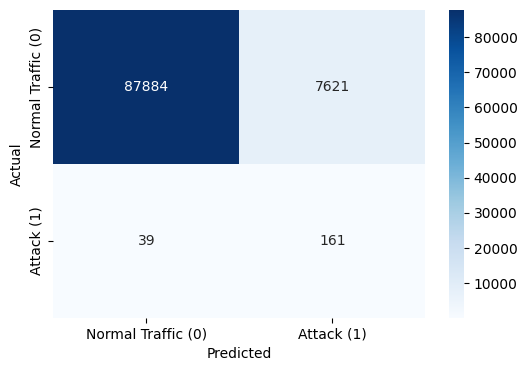

                precision    recall  f1-score   support

Normal Traffic       1.00      0.92      0.96     95505
        Attack       0.02      0.81      0.04       200

      accuracy                           0.92     95705
     macro avg       0.51      0.86      0.50     95705
  weighted avg       1.00      0.92      0.96     95705



In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
y_pred = final_model.predict(X_test_adv_final)
y_pred = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test_adv_final, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test_adv_final, y_pred, target_names=['Normal Traffic', 'Attack']))


In [42]:
import numpy as np
import pandas as pd

# --- 1) Collect only the successfully flipped samples (1 → 0) ---
success_mask = zoo_attack_on_attacks["successes_bool"]
attacked_idx = zoo_attack_on_attacks["attacked_indices"]
successful_local_idx = np.array(attacked_idx)[success_mask]

# Standardized (model-space) originals + adversarials for those successes
X_orig_success_std = X_attack[successful_local_idx]
X_adv_success_std  = zoo_attack_on_attacks["X_adv"][successful_local_idx]

# Sanity: keep only those that truly flipped 1->0 according to the model
pred_orig = (final_model.predict(X_orig_success_std, verbose=0).ravel() > 0.5).astype(int)
pred_adv  = (final_model.predict(X_adv_success_std,  verbose=0).ravel() > 0.5).astype(int)

flip_mask = (pred_orig == 1) & (pred_adv == 0)
X_orig_success_std = X_orig_success_std[flip_mask]
X_adv_success_std  = X_adv_success_std[flip_mask]
pred_orig = pred_orig[flip_mask]
pred_adv  = pred_adv[flip_mask]

# --- 2) Inverse-transform back to original feature units ---
# scaler_full was fit on the selected columns used by the model (Xtr_sel)
X_orig_success = scaler_full.inverse_transform(X_orig_success_std)
X_adv_success  = scaler_full.inverse_transform(X_adv_success_std)

# --- 3) Build DataFrames with your desired columns and formatting ---
cols = ["Offset", "sTtl", "sMeanPktSz", "sHops", "State"]  # order you want to display

def make_df(X, preds):
    df = pd.DataFrame(X, columns=cols)
    return df

df_orig = make_df(X_orig_success, pred_orig)
df_adv  = make_df(X_adv_success,  pred_adv)

# --- 4) Show up to 10 examples in your exact format ---
n_show = min(10, len(df_orig))

print("Original Attack Samples (that later flipped 1→0):\n")
print(df_orig.head(n_show).to_string(index=True))

print("\nAdversarial Counterparts:\n")
print(df_adv.head(n_show).to_string(index=True))


Original Attack Samples (that later flipped 1→0):

       Offset  sTtl  sMeanPktSz  sHops  State
0   2528596.0  63.0   42.000000    1.0    4.0
1  19172012.0  63.0   42.000000    1.0    6.0
2   2916940.0  63.0  149.199997    1.0    1.0
3  19986316.0  63.0   42.000000    1.0    6.0
4  23163420.0  63.0   42.000000    1.0    6.0
5  22344820.0  63.0   42.000000    1.0    6.0
6  18794948.0  63.0   42.000000    1.0    6.0
7   2176412.0  63.0   42.000000    1.0    4.0
8  21778068.0  63.0   42.000000    1.0    6.0
9   2771604.0  63.0   42.000000    1.0    4.0

Adversarial Counterparts:

         Offset       sTtl  sMeanPktSz         sHops  State
0 -6.816789e+05  46.225209   74.583411 -7.347067e-08    4.0
1  2.238229e+07  63.000000   85.542695  1.000000e+00    6.0
2 -2.933348e+05  46.225209  105.657302 -7.347067e-08    1.0
3  2.319659e+07  63.000000   85.542695  1.000000e+00    6.0
4  2.637369e+07  63.000000   85.542695  1.000000e+00    6.0
5  2.511958e+07  63.000000   76.503840  1.000000e+00   